In [25]:
# 1. Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# 2. Download AAPL Data (Past 1 Year)
aapl = yf.download('AAPL', period='3y', auto_adjust=False)
aapl.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [27]:
aapl

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-04-11,163.107071,165.750000,169.029999,165.500000,168.710007,72246700
2022-04-12,164.986664,167.660004,169.869995,166.639999,168.020004,79265200
2022-04-13,167.682907,170.399994,171.039993,166.770004,167.389999,70618900
2022-04-14,162.654404,165.289993,171.270004,165.039993,170.619995,75329400
2022-04-18,162.437958,165.070007,166.600006,163.570007,163.919998,69023900
...,...,...,...,...,...,...
2025-04-02,223.889999,223.889999,225.190002,221.020004,221.320007,35905900
2025-04-03,203.190002,203.190002,207.490005,201.250000,205.539993,103419000


In [28]:
# 3. Calculate Technical Indicators
# Simple Moving Averages
aapl['SMA_20'] = aapl['Close'].rolling(window=20).mean()
aapl['SMA_50'] = aapl['Close'].rolling(window=50).mean()
print(aapl.head(10))

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2022-04-11  163.107071  165.750000  169.029999  165.500000  168.710007   
2022-04-12  164.986664  167.660004  169.869995  166.639999  168.020004   
2022-04-13  167.682907  170.399994  171.039993  166.770004  167.389999   
2022-04-14  162.654404  165.289993  171.270004  165.039993  170.619995   
2022-04-18  162.437958  165.070007  166.600006  163.570007  163.919998   
2022-04-19  164.730759  167.399994  167.820007  163.910004  165.020004   
2022-04-20  164.563477  167.229996  168.880005  166.100006  168.759995   
2022-04-21  163.766403  166.419998  171.529999  165.910004  168.910004   
2022-04-22  159.210236  161.789993  167.869995  161.500000  166.460007   
2022-04-25  160.282867  162.880005  163.169998  158.460007  161.119995   

Price         Volume SMA_20 SMA_50  


In [29]:
# Exponential Moving Average
aapl['EMA_20'] = aapl['Close'].ewm(span=20, adjust=False).mean()
aapl

Price,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,
2022-04-11,163.107071,165.750000,169.029999,165.500000,168.710007,72246700,NaN,NaN,165.750000
2022-04-12,164.986664,167.660004,169.869995,166.639999,168.020004,79265200,NaN,NaN,165.931905
2022-04-13,167.682907,170.399994,171.039993,166.770004,167.389999,70618900,NaN,NaN,166.357437
2022-04-14,162.654404,165.289993,171.270004,165.039993,170.619995,75329400,NaN,NaN,166.255776
2022-04-18,162.437958,165.070007,166.600006,163.570007,163.919998,69023900,NaN,NaN,166.142846
...,...,...,...,...,...,...,...,...,...
2025-04-02,223.889999,223.889999,225.190002,221.020004,221.320007,35905900,220.707001,230.1388,223.123537
2025-04-03,203.190002,203.190002,207.490005,201.250000,205.539993,103419000,219.100001,229.7260,221.225105


In [30]:
# Relative Strength Index (RSI)
delta = aapl['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
aapl['RSI'] = 100 - (100 / (1 + rs))

In [31]:
# Ensure Close column is used correctly
close_prices = aapl['Close']

# Recalculate SMA_20 and make sure it's a Series
sma_20 = close_prices.rolling(window=20).mean()

# Rolling Standard Deviation as Series
std_20 = close_prices.rolling(window=20).std()

# Bollinger Bands
upper_band = sma_20 + (2 * std_20)
lower_band = sma_20 - (2 * std_20)

# Assign back to DataFrame
aapl['SMA_20'] = sma_20
aapl['Upper_Band'] = upper_band
aapl['Lower_Band'] = lower_band


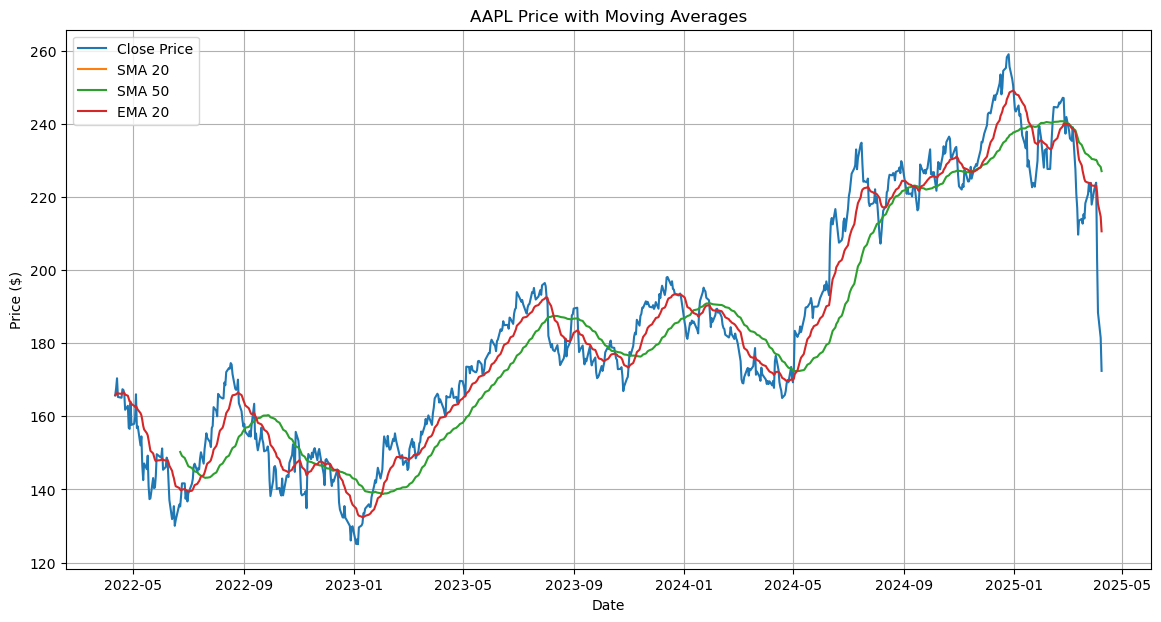

In [32]:
# 4. Plot Close Price with SMAs and EMA
plt.figure(figsize=(14, 7))
plt.plot(aapl['Close'], label='Close Price')
plt.plot(aapl['SMA_20'], label='SMA 20')
plt.plot(aapl['SMA_50'], label='SMA 50')
plt.plot(aapl['EMA_20'], label='EMA 20')
plt.title('AAPL Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

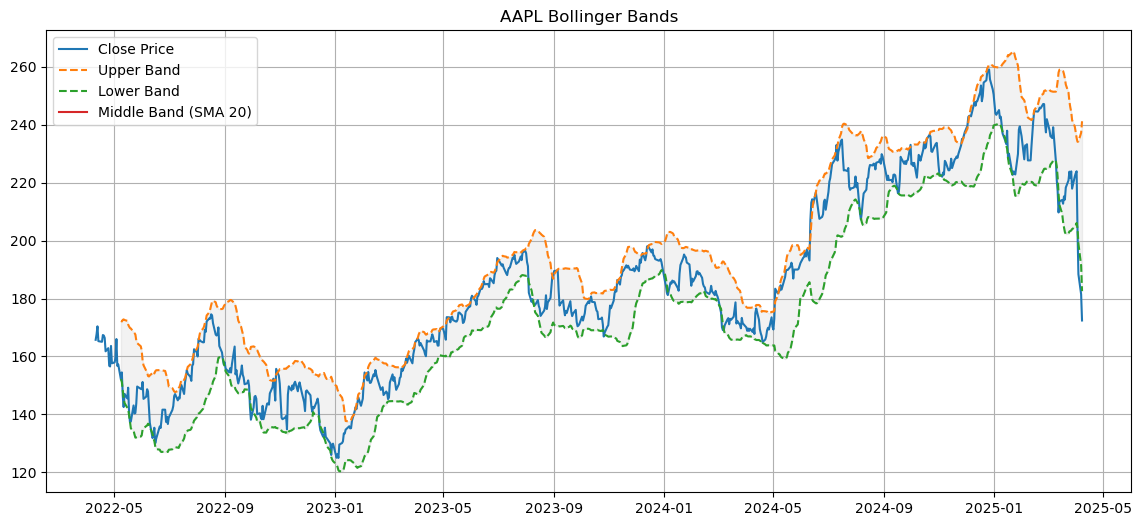

In [33]:
# 5. Plot Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(aapl['Close'], label='Close Price')
plt.plot(aapl['Upper_Band'], label='Upper Band', linestyle='--')
plt.plot(aapl['Lower_Band'], label='Lower Band', linestyle='--')
plt.plot(aapl['SMA_20'], label='Middle Band (SMA 20)', linestyle='-')
plt.fill_between(aapl.index, aapl['Lower_Band'], aapl['Upper_Band'], color='gray', alpha=0.1)
plt.title('AAPL Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()


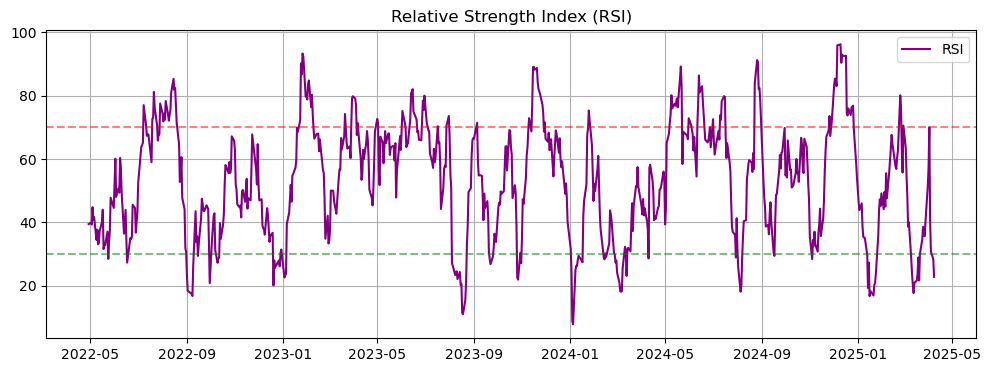

In [34]:
# 6. Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(aapl['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# 7. Insight Example
latest_rsi = aapl['RSI'].iloc[-1]
if latest_rsi > 70:
    print(f"RSI is {latest_rsi:.2f} -> Overbought zone")
elif latest_rsi < 30:
    print(f"RSI is {latest_rsi:.2f} -> Oversold zone")
else:
    print(f"RSI is {latest_rsi:.2f} -> Neutral zone")

RSI is 22.81 -> Oversold zone


In [36]:
aapl.to_csv("AAPL_Technical_Indicators.csv", index=True)
